# Linear Regression预测房价

In [115]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from sklearn.linear_model import LinearRegression # sk-learn库Linear Regression模型
from sklearn.model_selection import train_test_split # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库
import math #数学库
%matplotlib inline

从../input/kc_house_data.csv文件中读入数据

In [116]:
data = pd.read_csv("../input/kc_house_data.csv")
data.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [117]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

获得自变量X和因变量Y

In [118]:
X = data[['bedrooms','bathrooms','sqft_living','floors']]
y = data['price']
X.head(7)

,bedrooms,bathrooms,sqft_living,floors
0,3,1.00,1180,1.0
1,3,2.25,2570,2.0
2,2,1.00,770,1.0
3,4,3.00,1960,1.0
4,3,2.00,1680,1.0
5,4,4.50,5420,1.0
6,3,2.25,1715,2.0


获得2:1的训练：测试数据比例

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [120]:
xtrain = np.asmatrix(X_train)
xtest = np.asmatrix(X_test)
ytrain = np.ravel(y_train)
ytest = np.ravel(y_test)

观察房价和fetures之间的关系

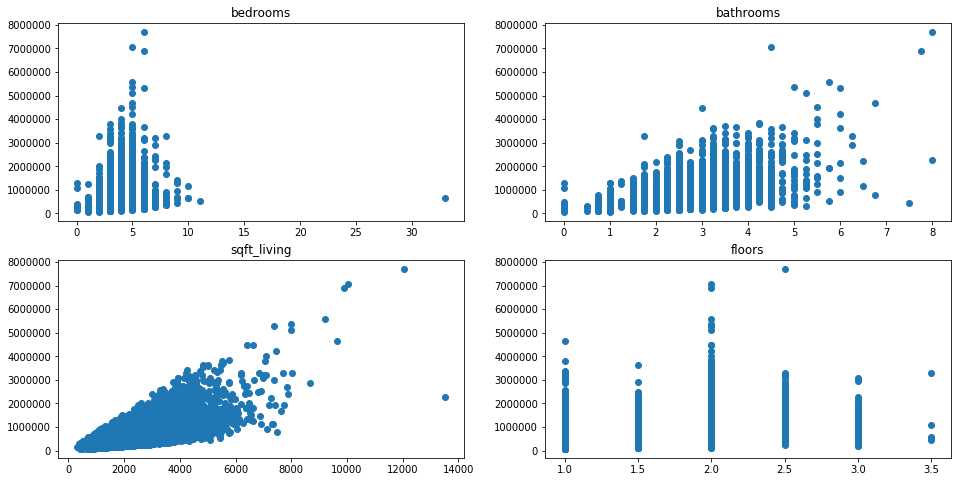

In [122]:
idx = 1

plt.figure(figsize=(16, 8))
for feature, vals in X.iteritems():
#     print('feature:', feature)
#     print('val:\n', vals)
    plt.subplot(2, 2, idx)
    plt.scatter(X[feature], y)
    plt.title(feature)
    idx += 1

观察各个feature分布

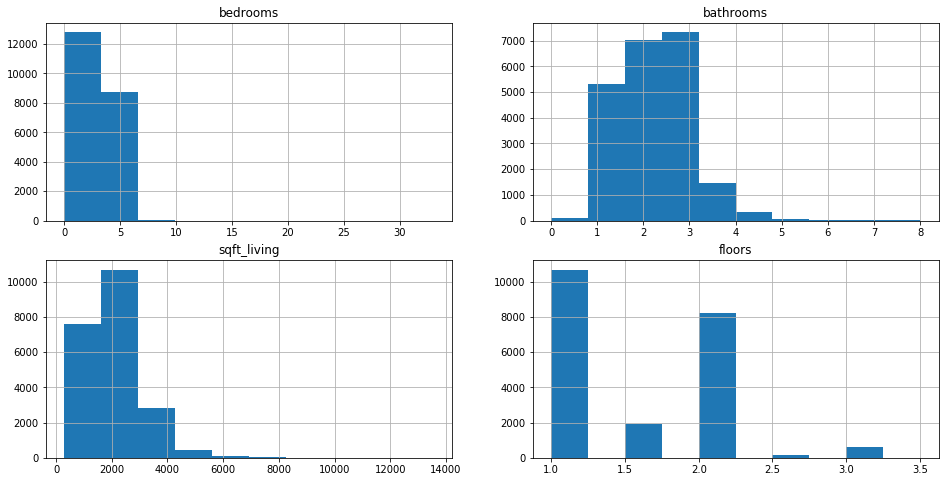

In [123]:
idx = 1

plt.figure(figsize=(16, 8))
for feature, vals in X.iteritems():
#     print('feature:', feature)
#     print('val:\n', vals)
    plt.subplot(2, 2, idx)
    X[feature].hist()
    plt.title(feature)
    idx += 1

用xtrain和ytrain训练模型

In [124]:
model = LinearRegression()
model.fit(X_train, y_train)
print('coef:{0}, intercept:{1}'.format(model.coef_,model.intercept_))

coef:[-50922.84333188   3528.47083162    300.53196548   5917.95028494], intercept:70434.63078815438


In [125]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,bedrooms,-50922.843332
1,bathrooms,3528.470832
2,sqft_living,300.531965
3,floors,5917.950285


In [126]:
#一个房子，3个卧室，2个卫生间，2500sqft，2层楼，预测房价
model.predict([[3,2,2500,2]])

array([687888.85672979])

训练集上的均方差MSE

In [127]:
pred = model.predict(X_train)
((pred-y_train)*(pred-y_train)).sum() / len(y_train)

64861227762.77785

平均相对误差

In [128]:
(abs(pred-y_train)/y_train).sum() / len(y_train)

0.3503162107753696

测试集合上的MSE

In [129]:
predtest = model.predict(X_test)
((predtest-y_test)*(predtest-y_test)).sum() / len(y_test)

69890356754.14203

In [130]:
(abs(predtest-y_test)/y_test).sum() / len(y_test)

0.3469595917187782